In [69]:
pip install lida[infographics]

  Obtaining dependency information for peacasso from https://files.pythonhosted.org/packages/13/3f/73e316496f3abf04cc7d4679afd02fb8cd4e90213e994b516cbecb231be5/peacasso-0.0.19a0-py3-none-any.whl.metadata
  Obtaining dependency information for accelerate from https://files.pythonhosted.org/packages/4d/a7/05c67003d659a0035f2b3a8cf389c1d9645865aee84a73ce99ddab16682f/accelerate-0.22.0-py3-none-any.whl.metadata
     -------------------------------------- 453.1/453.1 kB 9.6 MB/s eta 0:00:00
   ---------------------------------------- 3.9/3.9 MB 12.5 MB/s eta 0:00:00
   ---------------------------------------- 251.2/251.2 kB ? eta 0:00:00


In [48]:
import pandas as pd
from lida import Manager, llm,TextGenerationConfig 
import seaborn as sns
import os
from lida.utils import plot_raster 

In [49]:
lida = Manager(text_gen = llm("openai", api_key=os.getenv('OPENAI_API_KEY')))
iris = sns.load_dataset('iris')

In [50]:
summary = lida.summarize(iris)
summary
goals = lida.goals(summary, n=5)

## Goals dataframe

In [56]:
goals

[Goal(index=0, question='What is the distribution of sepal_length?', visualization='histogram of sepal_length', rationale='This tells us about the frequency of different sepal lengths in the dataset.'),
 Goal(index=1, question='How does petal_length vary across different species?', visualization='box plot of petal_length by species', rationale='This helps us compare the distribution of petal lengths across different species.'),
 Goal(index=2, question='What is the relationship between sepal_length and petal_length?', visualization='scatter plot of sepal_length vs petal_length', rationale='This helps us understand if there is any correlation between sepal_length and petal_length.'),
 Goal(index=3, question='What is the distribution of petal_width?', visualization='histogram of petal_width', rationale='This tells us about the frequency of different petal widths in the dataset.'),
 Goal(index=4, question='How does sepal_width vary across different species?', visualization='box plot of sep

## Show Plots

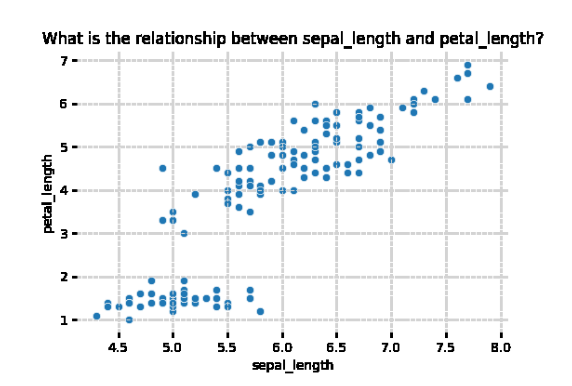

In [63]:
i=2
library = "seaborn"
textgen_config = TextGenerationConfig(n=1, temperature=0.2, use_cache=True)
charts = lida.visualize(summary=summary, goal=goals[i], library=library,textgen_config=textgen_config)
plot_raster(charts[0].raster)

In [64]:
code = charts[0].code

In [65]:
print(code)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def plot(data: pd.DataFrame):
    sns.scatterplot(x='sepal_length', y='petal_length', data=data)
    plt.title('What is the relationship between sepal_length and petal_length?', wrap=True)
    return plt;

chart = plot(data)


In [66]:
explanations = lida.explain(code=code, library=library, textgen_config=textgen_config) 
for row in explanations[0]:
    print(row["section"]," ** ", row["explanation"])

accessibility  **  The chart is a scatterplot with sepal_length on the x-axis and petal_length on the y-axis. The chart aims to show the relationship between sepal_length and petal_length. The chart uses default seaborn colors and markers.
transformation  **  There is no data transformation in this code.
visualization  **  The code first calls the seaborn scatterplot function and passes in the x and y variables as well as the data. The function generates the scatterplot. The code then adds a title to the plot using the matplotlib pyplot title function. The title is 'What is the relationship between sepal_length and petal_length?' and is wrapped to fit within the plot. Finally, the function returns the plot object.


# Infographics 

In [75]:
infographics = lida.infographics(visualization = charts[0].raster, n=1)

Fetching 29 files:   0%|          | 0/29 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


AssertionError: Torch not compiled with CUDA enabled

In [73]:
evaluations = lida.evaluate(code=code,  goal=goals[i], library=library)
evaluations

[[{'dimension': 'bugs',
   'score': 10,
   'rationale': 'No bugs, syntax errors, or typos found.'},
  {'dimension': 'transformation',
   'score': 10,
   'rationale': 'No data transformation is needed for this visualization.'},
  {'dimension': 'compliance',
   'score': 10,
   'rationale': 'The code meets the specified visualization goal of showing the relationship between sepal_length and petal_length.'},
  {'dimension': 'type',
   'score': 9,
   'rationale': 'The scatterplot is an appropriate visualization type for showing the relationship between two continuous variables. However, a regression line or a trend line could be added to better show the relationship.'},
  {'dimension': 'encoding',
   'score': 10,
   'rationale': 'The data is encoded appropriately with sepal_length on the x-axis and petal_length on the y-axis.'},
  {'dimension': 'aesthetics',
   'score': 9,
   'rationale': 'The aesthetics of the visualization are appropriate for a scatterplot. However, the title could be imp